<a href="https://colab.research.google.com/github/Fevzierenn/Reddit-Post-Popularity-Classification-DeepLearning/blob/main/soilTypePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

In [16]:
import zipfile
import os

# Zip dosyasının yolu
zip_path = '/content/soilDataset.zip'

# Çıkarılacak hedef klasör
extract_path = '/content/soilDataset_extracted'

# Zip dosyasını aç ve çıkar
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Zip başarıyla '{extract_path}' klasörüne çıkar")

Zip başarıyla '/content/soilDataset_extracted' klasörüne çıkar


In [17]:
import zipfile
import os

# Zip dosyasının yolu
zip_path = '/content/soilDataset.zip'

# Zip dosyasını aç
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # İçerikteki dosyaları listele
    file_list = zip_ref.namelist()
    print("Zip içeriği:")
    for file in file_list:
        print(file)


Zip içeriği:
Dataset/Train/Alluvial soil/01060602previewen-02b.jpg
Dataset/Train/Alluvial soil/01060602previewen-02d.jpg
Dataset/Train/Alluvial soil/1000_F_240425429_YL91trtDxXQl8L0OKP7zyngeSb63olAC.jpg
Dataset/Train/Alluvial soil/Alluvial-Soil..png
Dataset/Train/Alluvial soil/Alluvial-soil-distribution-in-India-1.jpeg
Dataset/Train/Alluvial soil/Alluvial-soil-distribution-in-India.jpg
Dataset/Train/Alluvial soil/Alluvial_1.jpg
Dataset/Train/Alluvial soil/Alluvial_10.jpg
Dataset/Train/Alluvial soil/Alluvial_11.jpg
Dataset/Train/Alluvial soil/Alluvial_12 - Copy.jpg
Dataset/Train/Alluvial soil/Alluvial_12.jpg
Dataset/Train/Alluvial soil/Alluvial_13.jpg
Dataset/Train/Alluvial soil/Alluvial_14.jpg
Dataset/Train/Alluvial soil/Alluvial_15.jpg
Dataset/Train/Alluvial soil/Alluvial_16 - Copy.jpg
Dataset/Train/Alluvial soil/Alluvial_16.jpg
Dataset/Train/Alluvial soil/Alluvial_17.jpg
Dataset/Train/Alluvial soil/Alluvial_18 - Copy.jpg
Dataset/Train/Alluvial soil/Alluvial_18.jpg
Dataset/Train/Alluv

extract images and label for X_train and Y_train

Extract images and label for X_test and y_test

In [19]:
import os
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
import timm  # Vision Transformer modelleri için


In [20]:
# Zip dosyasını çıkar
import zipfile

zip_path = '/content/soilDataset.zip'
extract_path = '/content/soilDataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Veri yolları
train_dir = os.path.join(extract_path, 'Train')



In [21]:
SEED = 42
BATCH_SIZE = 32
VAL_SPLIT = 0.2
IMG_SIZE = 224

In [24]:
from torch.utils.data import DataLoader, Subset, random_split

In [25]:
# Klasör yolları
base_path = '/content/soilDataset_extracted/Dataset'
train_path = os.path.join(base_path, 'Train')
test_path = os.path.join(base_path, 'test')

# Dönüşümler
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Tüm train verisi
full_train_dataset = ImageFolder(train_path, transform=transform)
num_classes = len(full_train_dataset.classes)

# Validation ayır
val_size = int(len(full_train_dataset) * VAL_SPLIT)
train_size = len(full_train_dataset) - val_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# Test verisi
test_dataset = ImageFolder(test_path, transform=transform)

# DataLoader'lar
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("Sınıflar:", full_train_dataset.classes)


Sınıflar: ['Alluvial soil', 'Black Soil', 'Clay soil', 'Red soil']


In [26]:
model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=num_classes)
model.to(device)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (norm): Identity()
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False

In [27]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)

def train_epoch(model, loader):
    model.train()
    total_loss = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def evaluate(model, loader, label_names):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    print(classification_report(all_labels, all_preds, target_names=label_names))


In [28]:
EPOCHS = 10
for epoch in range(EPOCHS):
    loss = train_epoch(model, train_loader)
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss:.4f}")
    print("Validation:")
    evaluate(model, val_loader, full_train_dataset.classes)


Epoch 1/10, Loss: 0.5043
Validation:
               precision    recall  f1-score   support

Alluvial soil       0.85      0.94      0.89       102
   Black Soil       0.93      0.95      0.94        44
    Clay soil       0.83      0.74      0.78        39
     Red soil       1.00      0.86      0.93        59

     accuracy                           0.89       244
    macro avg       0.90      0.88      0.89       244
 weighted avg       0.90      0.89      0.89       244

Epoch 2/10, Loss: 0.1828
Validation:
               precision    recall  f1-score   support

Alluvial soil       0.98      0.86      0.92       102
   Black Soil       0.90      0.98      0.93        44
    Clay soil       0.75      0.85      0.80        39
     Red soil       0.95      1.00      0.98        59

     accuracy                           0.91       244
    macro avg       0.89      0.92      0.91       244
 weighted avg       0.92      0.91      0.91       244

Epoch 3/10, Loss: 0.1190
Validation:
   

In [29]:
print("Final Test:")
evaluate(model, test_loader, full_train_dataset.classes)


Final Test:
               precision    recall  f1-score   support

Alluvial soil       0.93      0.96      0.95        54
   Black Soil       0.99      0.97      0.98       116
    Clay soil       0.98      0.98      0.98        65
     Red soil       0.99      1.00      1.00       105

     accuracy                           0.98       340
    macro avg       0.97      0.98      0.98       340
 weighted avg       0.98      0.98      0.98       340



In [30]:
torch.save(model.state_dict(), 'vit_soil_classifier.pth')


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(model, loader, label_names):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_names, yticklabels=label_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (Test Set)')
    plt.show()


In [37]:
from sklearn.metrics import precision_recall_fscore_support

def plot_metrics_bar(model, loader, label_names):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, labels=range(len(label_names)))

    x = np.arange(len(label_names))
    width = 0.25

    plt.figure(figsize=(10, 6))
    plt.bar(x - width, precision, width, label='Precision')
    plt.bar(x, recall, width, label='Recall')
    plt.bar(x + width, f1, width, label='F1 Score')

    plt.xticks(x, label_names, rotation=45)
    plt.ylim(0, 1.1)
    plt.title('Test Set Metrics by Class')
    plt.legend()
    plt.tight_layout()
    plt.show()


Test Set Classification Report:
               precision    recall  f1-score   support

Alluvial soil       0.93      0.96      0.95        54
   Black Soil       0.99      0.97      0.98       116
    Clay soil       0.98      0.98      0.98        65
     Red soil       0.99      1.00      1.00       105

     accuracy                           0.98       340
    macro avg       0.97      0.98      0.98       340
 weighted avg       0.98      0.98      0.98       340



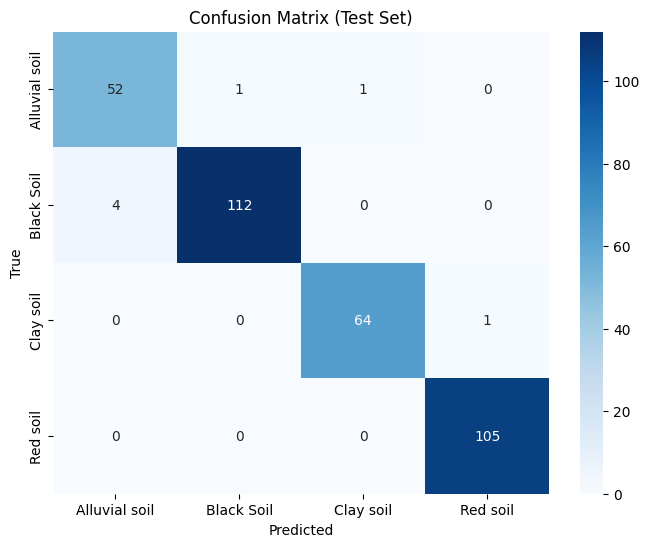

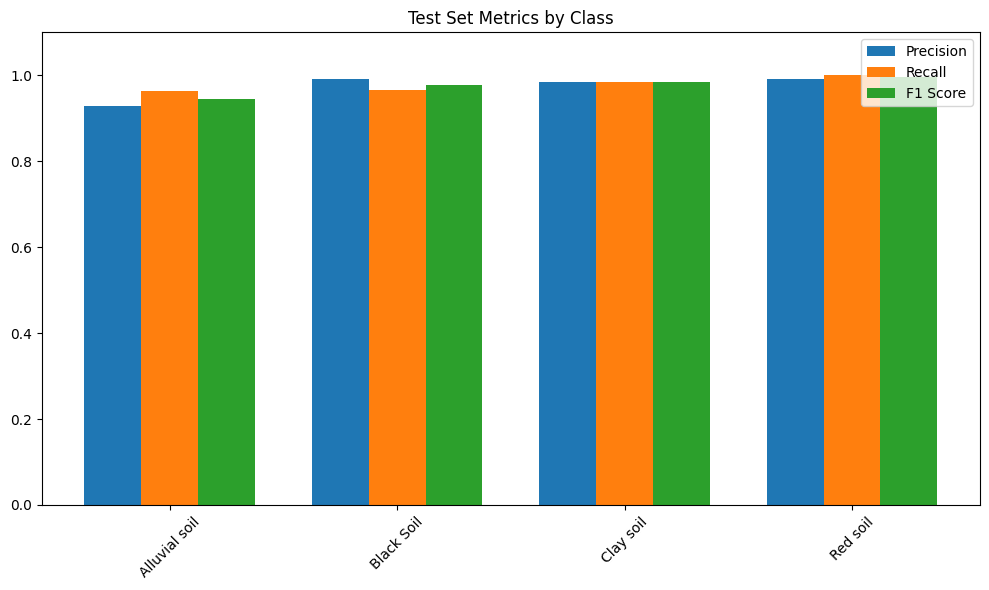

In [38]:
print("Test Set Classification Report:")
evaluate(model, test_loader, full_train_dataset.classes)

plot_confusion_matrix(model, test_loader, full_train_dataset.classes)
plot_metrics_bar(model, test_loader, full_train_dataset.classes)


In [41]:
from PIL import Image

def predict_image(model, image_path, transform, class_names):
    model.eval()
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image_tensor)
        probs = torch.softmax(output, dim=1)
        pred_class = torch.argmax(probs, dim=1).item()
        confidence = probs[0][pred_class].item()

    print(f"Tahmin edilen sınıf: {class_names[pred_class]}")
    print(f"Güven: {confidence:.2f}")


In [47]:
# Görsel yolu
image_path = '/content/red.jpg'

# Aynı transform kullanılmalı
inference_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Tahmin et
predict_image(model, image_path, inference_transform, full_train_dataset.classes)


Tahmin edilen sınıf: Red soil
Güven: 1.00
